# Initial Data Set Exploration With pandas DataFrames

Now we will dive into our first data set and see how the features of pandas can be used for analysis. Along the way, we will encounter some real problems that you are likely to experience in your own analyses. 

Let’s begin by opening the file `running_data.csv`.

In [1]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
1.12.1
0.20.1


pandas provides a lot of functions for reading in different data types.  Each of these will read in the data as a DataFrame. We will use the `read_csv` command because we are working with a comma-separated file. However, you should know that there are a lot of other functions available. These include the following:

- `read_csv`
- `read_excel`
- `read_hdf`
- `read_sql`
- `read_json`
- `read_msgpack` (experimental)
- `read_html`
- `read_gbq` (experimental)
- `read_stata`
- `read_clipboard`
- `read_pickle`

In [2]:
df = pd.read_csv('../data/raw_running_data.csv')
print(type(df))
df.head(10)

<class 'pandas.core.frame.DataFrame'>


,Date,Miles,Time
0,8/2/14,1.70,NaN
1,8/3/14,1.40,NaN
2,8/4/14,2.10,NaN
3,8/6/14,2.38,NaN
4,8/7/14,2.30,NaN
5,8/8/14,3.40,NaN
6,8/9/14,2.50,NaN
7,8/10/14,3.36,0:28:37
8,8/11/14,1.67,0:13:07
9,8/12/14,1.42,0:10:35


As you can see, we have read in the data and gotten a DataFrame back. Before we continue, take a look at the parameters that go into the `read_csv` function.  You will see that there are many options that we can set. We can skip rows and specify dtypes, compression, and indexes. This function could be a whole lesson by itself.

In [3]:
?pd.read_csv()

For now, remember that you have a lot of options when reading in files. You can do a lot of the same processing after you finish reading a file, but some operations are easiest to perform right at the point of reading.

Let's explore the data types we have in this data set.

In [4]:
df.dtypes

Date      object
Miles    float64
Time      object
dtype: object

The Date column and the Time column are both of time object.  This is the most general type, and it is probably not what we really want here.  We will see how to fix this shortly.

Before we do that we should know a bit more about this data. One of your instructors, Bill Chambers, recorded all of his runs from August 1, 2014, to January 1, 2015. During these several months, distance, time of the run, and the date were also recorded.

In [5]:
df.columns

Index(['Date', 'Miles', 'Time'], dtype='object')


Now we can see our three columns here: Date, Miles, and Time. If we look back at the head command, we can also see that we have some NaN values when the time was not recorded.

We can also examine our index, which is just the integers; we will want to change that later as well.

In [7]:
df.index

RangeIndex(start=0, stop=81, step=1)

# Time Series Data

pandas is absolutely fantastic with time data. It has great functionality that will make our Date and Time columns easy to work with. However, before we can leverage it correctly, we need to convert our columns to date/datetime types so that we can query with dates.

Let's get started there. First we will manipulate the Date column.

In [6]:
df['Date'].head()

0    8/2/14
1    8/3/14
2    8/4/14
3    8/6/14
4    8/7/14
Name: Date, dtype: object

Now when we look at our date Series, we can see that the dtype is `object`. We want to change that to something that is date based, specifically `datetime64`.

Naturally there are several ways that we can fix this column, but arguably the easiest is just to read in the dates correctly when we read in the csv in the first place. Here is an updated `read_csv` statement.

In [7]:
df = pd.read_csv('../data/raw_running_data.csv', parse_dates=['Date'])

In [8]:
df.Date.head()

0   2014-08-02
1   2014-08-03
2   2014-08-04
3   2014-08-06
4   2014-08-07
Name: Date, dtype: datetime64[ns]

As you can see, we have the correct dates now. 

Although pandas is pretty good at parsing dates, it will occasionally  make errors. You may have to write a custom date parser, but doing so is outside the scope of this course. The documentation is available online if you ever need to do this.

Let’s continue with our analysis.

Now that our dates are parsed, let’s try to set the Dates as the index.

In [9]:
df.set_index('Date', inplace=True)

You will see I am using the `inplace=True` option. This is because pandas will typically try to return a new DataFrame rather than editing our current one. `inplace` ensures that it edits the current DataFrame instead. In most cases, I prefer to create new DataFrames (remember our discussion about the benefits of immutability), but it is good to know this is available as well.

Now that we have set our index, let's take a look at our DataFrame.

In [11]:
df.head()

,Miles,Time
Date,,
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN


It looks like we have correctly created a Date column and set it to work as our index.  Next, let's plot the data and see what it looks like.

## Plotting

We can start by calling the `plot` method on the DataFrame.

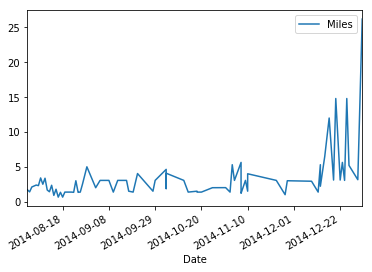

In [12]:
df.plot()

You will see that the `plot` method prints what it can. It does not understand what our time column is at this point, so it does not plot that. We will address that a bit later. However it understands that index is a `datetime64` object, so it assumes that we want to print the data as a time Series. It does that all automatically for us.

In [19]:
?df.plot


You can see there are different options when plotting our data. The default is a line chart, but we also have bar charts, area charts, or density charts (which can be used with appropriate kinds of data).

Let's try out some of the other chart types.

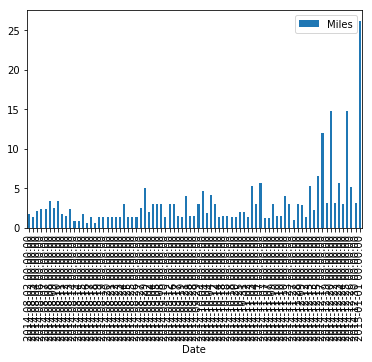

In [13]:
df.plot(kind='bar')

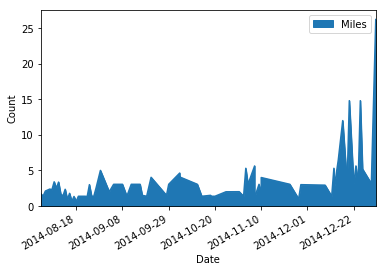

In [14]:
df.plot(kind='area')
plt.ylabel("Count")

That `plt` module is `pyplot` and is a part of `matplotlib`, which we imported at the top of our notebook. You also may have noticed that we have started including the magic command `%matplotlib inline` at the top of our files. That allows us to embed matplotlib graphs in our notebooks.

Let's continue with our analysis. You will notice that at this point we have a fair amount of data; however, pandas/IPython will not print it all even if we try to. This is because doing so would be troublesome for the displays. Imagine if this file were a million lines long; our system would likely crash.

pandas substitutes those rows that it skips with `...`

In [16]:
df

,Miles,Time
Date,,
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37
2014-08-11,1.67,0:13:07


Now that we have displayed the data in our DataFrame both as a graph and as a table, let’s try summarizing it a bit better. 

Do you remember the `describe` method for the pandas Series? We can use it for a DataFrame as well. Again, this command is going to give us some basic summary statistics about our data, including the number of observations we have, the mean, and standard deviation as well as min and max and quartiles.

In [17]:
df.describe()

,Miles
count,81.000000
mean,3.137531
std,3.634519
min,0.650000
25%,1.370000
50%,2.100000
75%,3.050000
max,26.200000


Now that we have described the data and also printed out most of the table, we should start examining the data to clean it and make sure that everything is regular.

You should pause the video and explore the data on your own before we continue. There is something a bit irregular about this data, and I will give you a hint: it has to do with the dates.

Go ahead and pause now.

------

Do you think you have found the problem?

The problem is that our data is recorded on inconsistent days. You will see dates that have multiple entries and others that do not have any entry at all. 

For instance, let's query for November. Given what you know about programming, querying a data set to find dates that match November could be a challenge. We could imagine having to write a function to extract months, or something similar.  Because of the power of pandas, however, we simply have to pass in a string inside square brackets.

In [18]:
df['2014-11']

,Miles,Time
Date,,
2014-11-02,1.37,0:08:43
2014-11-03,5.30,0:39:26
2014-11-04,3.05,0:22:12
2014-11-07,5.63,0:49:05
2014-11-07,1.26,NaN
2014-11-07,1.20,NaN
2014-11-09,3.05,0:22:36
2014-11-10,1.50,0:09:00
2014-11-10,1.50,0:11:33


Now that we have seen November, we can see our problem. Bill ran three times on the 7th, and he did not run at all from the 10th to the 23rd. Let's see how many total rows we have in November.

In [19]:
len(df['2014-11'])

13

This kind of issue comes up quite a bit in data analysis. You might be analyzing some data, trying to get patterns out of it, and you notice some inconsistencies, then realize the data was collected in a strange way.

Fortunately, as you might have guessed, pandas makes it easy to fill in these gaps.

The first step for us will be to manually create the start and end dates.

In [20]:
from datetime import datetime
start = datetime(2014,8,1)
end = datetime(2015,1,2)

We can also just grab the start and end from the index itself.

In [21]:
start = df.index.min()
end = df.index.max()
print(start, end)

2014-08-02 00:00:00 2015-01-01 00:00:00


We can also avoid importing `datetime` by just using the pandas `datetime` function, which creates a `datetime` in basically the same way.

In [22]:
start = pd.datetime(2014,8,1)

Now that we have our date range, we need to figure out a way to fill in the gaps in our current data set. There are lots of different ways to do this.  Here is one way that is relatively straightforward and easy to explain.

First we will create a new DataFrame.

In [23]:
d = pd.DataFrame(index=pd.date_range(start, end))

In [24]:
d.head()

""
2014-08-01
2014-08-02
2014-08-03
2014-08-04
2014-08-05


You can see that we have  our dates in the order that we want (and filled in for every day of the week).

Now we need to join this DataFrame with our original DataFrame. We will do this with a SQL join. Below is a handy image to help you understand what we are doing.

## Joins

In [25]:
from IPython.display import Image
Image(url='http://i.stack.imgur.com/GbJ7N.png')

Let's go through the different ways that we can join this data. We can take our original `df` and join the new DataFrame to it.

In [26]:
df.join(d).head(10)

,Miles,Time
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37
2014-08-11,1.67,0:13:07
2014-08-12,1.42,0:10:35


We can also join our old DataFrame to the new one. You can see that if our new DataFrame is the one of reference, it will change that start date to be the start date in the new `d` DataFrame as opposed to the start date of the old DataFrame as we have above.

In [27]:
d.join(df).head(10)

,Miles,Time
2014-08-01,NaN,NaN
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,NaN,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37


An outer join will combine it on all values in both DataFrames.

In [28]:
df.join(d, how='outer')

,Miles,Time
2014-08-01,NaN,NaN
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,NaN,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37


In [31]:
df = df.join(d, how='outer')

So we have performed an outer join. There are other kinds of joins like inner joins, left, and right that you can look up in the documentation.

Now we have a new problem: we have some NaN values in our Miles column. Take a look at the first five values and the plot of the distances on each day.

In [30]:
df.head()

,Miles,Time
2014-08-01,NaN,NaN
2014-08-02,1.7,NaN
2014-08-03,1.4,NaN
2014-08-04,2.1,NaN
2014-08-05,NaN,NaN


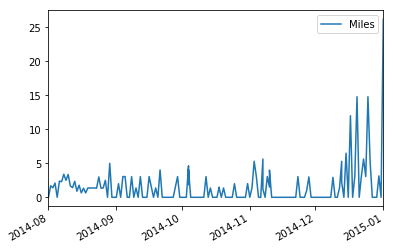

In [33]:
df.plot()


Remember that we will just use the `fillna` method to fill it in. Since we will assume Bill ran 0 miles on those days, we simply fill it with 0 and do it inplace. Now our plot looks much better.

In [32]:
df.Miles.fillna(0, inplace=True)

In [39]:
df.head()

,Miles,Time
2014-08-01,0.0,NaN
2014-08-02,1.7,NaN
2014-08-03,1.4,NaN
2014-08-04,2.1,NaN
2014-08-05,0.0,NaN


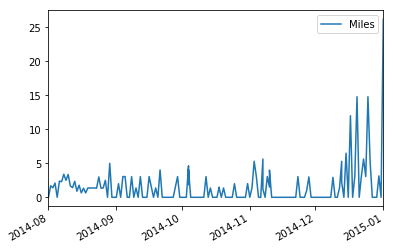

In [34]:
df.plot()

We can see now that we have a continuous line from the first date to the last.

Let’s save our work thus far. We have modified this data set a bit so it is worth saving our progress for later analysis. Of course, it is important to save our notebook as well so that we can know how we changed the data.

Saving data is about as easy as reading it in; we just specify the location and save a CSV. If you try and tab complete from `to`, you can see that there are numerous different file formats that we can save to. We will not cover these in detail, but they are there for you if you need them.

In [35]:
df.to_csv('../data/date_fixed_running_data.csv')

We have covered a lot of basic data manipulation. We have cleaned up a data set and learned how to parse dates and perform basic joins along indexes. We have learned some basic plotting and basic data descriptions. We also know how to read in CSVs and save them for later.

Now that we've saved our csv, let's reimport it to continue to sharpen our skills. We will see again that pandas does not understand the dates automatically, so we need to do that manually. 

In [36]:
df = pd.read_csv('../data/date_fixed_running_data.csv')
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-01,0.0,NaN
1,2014-08-02,1.7,NaN
2,2014-08-03,1.4,NaN
3,2014-08-04,2.1,NaN
4,2014-08-05,0.0,NaN


However, when we import the data, it does not quite look the same. This is because when you save a DataFrame to a CSV, it does not label the index column.

In [37]:
df['Unnamed: 0'].head()

0    2014-08-01
1    2014-08-02
2    2014-08-03
3    2014-08-04
4    2014-08-05
Name: Unnamed: 0, dtype: object

Now our Date column is actually the ‘zero’ indexed column. When you use the `parse_dates` parameter, you can use either the column name (if available) or the column index number (counting from zero).

In [39]:
# df = pd.read_csv('../data/date_fixed_running_data.csv', parse_dates=['Date'])
# above command fails...
df = pd.read_csv('../data/date_fixed_running_data.csv', parse_dates=[0])

In [40]:
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-01,0.0,NaN
1,2014-08-02,1.7,NaN
2,2014-08-03,1.4,NaN
3,2014-08-04,2.1,NaN
4,2014-08-05,0.0,NaN


In [41]:
df.dtypes

Unnamed: 0    datetime64[ns]
Miles                float64
Time                  object
dtype: object

## Renaming Columns 

At this point, we have the right data type but we still have an ugly column label, so let's rename our columns. There are two common ways to do this--one simple and one a bit more fancy. The simple way is just to create the index that we want and set it to that.

In [42]:
cols = ['Date', 'Miles', 'Time']
df.columns = cols
df.head()

,Date,Miles,Time
0,2014-08-01,0.0,NaN
1,2014-08-02,1.7,NaN
2,2014-08-03,1.4,NaN
3,2014-08-04,2.1,NaN
4,2014-08-05,0.0,NaN


We can also do it with a dictionary-style lookup by using the rename method.

In [43]:
df.rename(columns={df.columns[0]:'Date NEW!'}, inplace=True)

In [44]:
df.head()

,Date NEW!,Miles,Time
0,2014-08-01,0.0,NaN
1,2014-08-02,1.7,NaN
2,2014-08-03,1.4,NaN
3,2014-08-04,2.1,NaN
4,2014-08-05,0.0,NaN


This is useful because if you have a lot of columns and you just want to rename one, you can avoid doing a lot of extra work.

In [45]:
df.rename(columns={df.columns[0]:'Date'}, inplace=True)

In [46]:
df.head()

,Date,Miles,Time
0,2014-08-01,0.0,NaN
1,2014-08-02,1.7,NaN
2,2014-08-03,1.4,NaN
3,2014-08-04,2.1,NaN
4,2014-08-05,0.0,NaN


Once we set the index we can plot our DataFrame again.


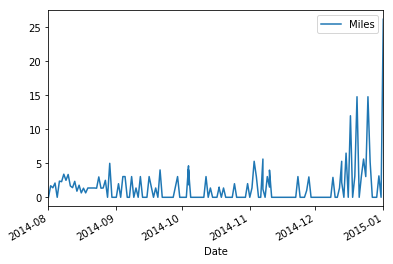

In [47]:
df.set_index('Date', inplace=True)
df.plot()

## Mapping Values + Manipulating Objects

One thing we will want to do is get a breakdown of times for each run. How long on average are the runs? What is the average rate at which Bill runs?

To get that, we will use a map function.  And we will do this step-by-step to make sure we get everything right.  First we will convert the running time to seconds; from there we can build up to minutes, hours, etc.

Right now our times are represented as `hours:minutes:seconds`. We need to get that to seconds, and we need to think about what to do with our NaN's.  Unlike our Miles column, when we are missing a value in the Time column, it is not reasonable to assume that a run took zero time. So in this case, we want to keep `NaN` values as they are.

In [49]:
raw_time_fmt = df.Time[0]

def get_total_seconds(raw_time):
    if raw_time is np.nan:
        return np.nan # if it's NaN, leave it
    hrs, mins, seconds = str(raw_time).split(':')
    seconds = int(seconds) + 60 * int(mins) + 60 * 60 * int(hrs)
    return seconds    
print(get_total_seconds(raw_time_fmt))

nan


In [50]:
df['Seconds'] = df.Time.map(get_total_seconds)

Okay, let's make sure that it worked.

In [51]:
df.head(10)

,Miles,Time,Seconds
Date,,,
2014-08-01,0.00,NaN,NaN
2014-08-02,1.70,NaN,NaN
2014-08-03,1.40,NaN,NaN
2014-08-04,2.10,NaN,NaN
2014-08-05,0.00,NaN,NaN
2014-08-06,2.38,NaN,NaN
2014-08-07,2.30,NaN,NaN
2014-08-08,3.40,NaN,NaN
2014-08-09,2.50,NaN,NaN


Now we can get some summary statistics for these runs.

In [52]:
df.describe()

,Miles,Seconds
count,167.000000,52.000000
mean,1.521796,1901.788462
std,2.973174,2560.424171
min,0.000000,376.000000
25%,0.000000,583.750000
50%,0.000000,1343.500000
75%,2.005000,1743.250000
max,26.200000,15643.000000


This is a nice example of how `np.NaN` is a useful feature in pandas. When we call the `describe` method, we get numerical answers.  Unlike NumPy, pandas ignores the missing values. 

If we were to fill in seconds with 0 for missing values in the Time column, it would greatly skew our statistics.  Let's take a look at how much things would change if we did that.

In [53]:
df.fillna(0).describe()

,Miles,Seconds
count,167.000000,167.000000
mean,1.521796,592.173653
std,2.973174,1671.620140
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.005000,559.500000
max,26.200000,15643.000000


As you can see, the results are very different. Always be careful when you are filling in empty values or removing them.

Now that we have seconds it would be useful to see minutes too. It can be hard to think in seconds. So let's add a new column.

We will do that with a simple `map` function.  This function will take each second count and divide it by 60.

In [54]:
df['Minutes'] = df['Seconds'].map(lambda x: x / 60)

In [55]:
df.describe()

,Miles,Seconds,Minutes
count,167.000000,52.000000,52.000000
mean,1.521796,1901.788462,31.696474
std,2.973174,2560.424171,42.673736
min,0.000000,376.000000,6.266667
25%,0.000000,583.750000,9.729167
50%,0.000000,1343.500000,22.391667
75%,2.005000,1743.250000,29.054167
max,26.200000,15643.000000,260.716667


We can see that the average run is around 30 minutes, but there is a lot of deviation from the mean, so a lot of runs are shorter and some are much longer. We can confirm that by looking at the percentiles as well. Let's plot the data to see if we can learn a bit more.

## Plotting



We are going to plot Miles and Minutes together in a scatter plot.

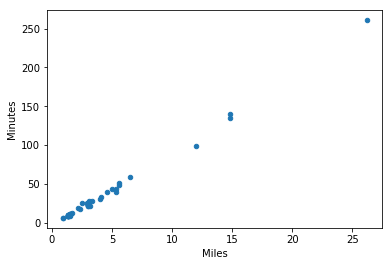

In [56]:
df.plot(x='Miles', y='Minutes', kind='scatter')

We get a graph that's remarkably linear. (No, this data is not fake; it is actually like that.)

One common test for linear relationship is to see how correlated the variables are.  We can do this with the `corr` method.

In [57]:
df.corr()

,Miles,Seconds,Minutes
Miles,1.000000,0.997203,0.997203
Seconds,0.997203,1.000000,1.000000
Minutes,0.997203,1.000000,1.000000


We can see that miles and time are very tightly correlated.  By default, `corr` computes the Pearson correlation coefficients.  There are two other correlation methods that you can use: kendall Tau and Spearman rank correlation. These are probably less applicable in this context, but it is good to know that they are there. All you have to do is pass in the method name.


In [58]:
df.corr(method="pearson")

,Miles,Seconds,Minutes
Miles,1.000000,0.997203,0.997203
Seconds,0.997203,1.000000,1.000000
Minutes,0.997203,1.000000,1.000000


Now let’s see a box plot. Box plots are common tools used by data scientists to get a sense for the distribution of a variable. This is also called a box and whisker plot. It shows several outliers as well as the mean and percentiles.

Think of this like a graphical version of the `describe` method. We can see that most of Bill's runs are below an hour except for a couple that are much longer.

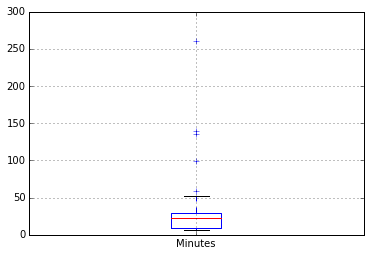

In [63]:
df.boxplot('Minutes', return_type='axes')


Now let's add a new column: minutes per mile. Because all of our Series are the same length, we can just divide one by the other to get that number.


In [59]:
df.Minutes/df.Miles

Date
2014-08-01          NaN
2014-08-02          NaN
2014-08-03          NaN
2014-08-04          NaN
2014-08-05          NaN
2014-08-06          NaN
2014-08-07          NaN
2014-08-08          NaN
2014-08-09          NaN
2014-08-10     8.516865
2014-08-11     7.854291
2014-08-12     7.453052
2014-08-13     7.411348
2014-08-14     6.962963
2014-08-14     6.962963
2014-08-15          NaN
2014-08-16          NaN
2014-08-17          NaN
2014-08-18          NaN
2014-08-19          NaN
2014-08-19          NaN
2014-08-20     6.970803
2014-08-21     6.861314
2014-08-22     6.630170
2014-08-23          NaN
2014-08-24          NaN
2014-08-25     6.508516
2014-08-25          NaN
2014-08-26     7.664234
2014-08-27    10.000000
                ...    
2014-12-04          NaN
2014-12-05          NaN
2014-12-06          NaN
2014-12-07          NaN
2014-12-08          NaN
2014-12-09     8.532423
2014-12-10          NaN
2014-12-11          NaN
2014-12-12     6.751825
2014-12-13     8.226415
2014-12-13 

Of course, a lot of those values will be `NaN` because of division, but that's no problem; we only want the result for the times that we have recorded anyway.

In [60]:
df['Min_per_mile'] = df['Minutes'] / df['Miles']

In [61]:
df.describe()

,Miles,Seconds,Minutes,Min_per_mile
count,167.000000,52.000000,52.000000,52.000000
mean,1.521796,1901.788462,31.696474,7.725297
std,2.973174,2560.424171,42.673736,0.954475
min,0.000000,376.000000,6.266667,6.000000
25%,0.000000,583.750000,9.729167,7.020479
50%,0.000000,1343.500000,22.391667,7.533333
75%,2.005000,1743.250000,29.054167,8.480023
max,26.200000,15643.000000,260.716667,10.000000


Now that we have `described` that data, let's take a look at the graph. How does the speed change with respect to the number of miles run?

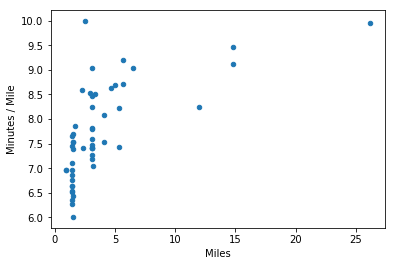

In [62]:
df.plot(x='Miles', y='Min_per_mile', kind='scatter')
plt.ylabel("Minutes / Mile")

Now we can see that there is a high degree of variability in the shorter distances, but that does seem to be a general increasing trend in the data.


Let’s see a histogram of the speeds. 
Histograms are a great way of representing the distribution of a continuous variable like minutes per mile.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B2E2F28>]], dtype=object)

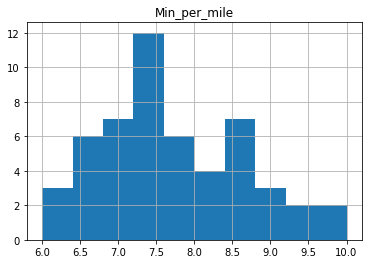

In [63]:
df.hist('Min_per_mile')


This distribution seems pretty centered around the 7- to 7.5-minute range. Histograms are `binning` information, so let's see if we can get a bit more detail by specifying the size of the bins.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B3258D0>]], dtype=object)

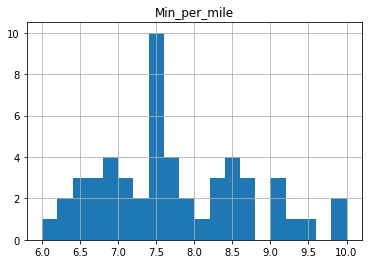

In [64]:
df.hist('Min_per_mile',bins=20)

Clearly this version provides a lot more information. We can see how consistent Bill's speed is; there really is not that much variability. This could just be a result of the distances that were run or the courses Bill chose to run.

This graph is worth saving for later analysis; let's tidy it up and save it. We can change the limits on each of the axes as well as the title--whether we want a grid, etc. Matplotlib is very flexible.

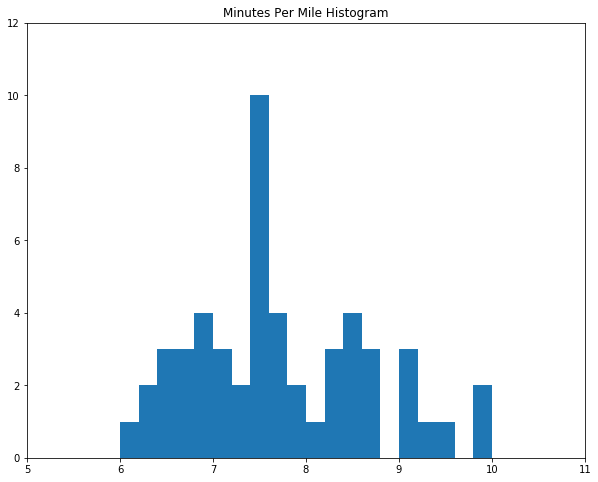

In [65]:
df.hist('Min_per_mile',bins=20, figsize=(10,8))
plt.xlim((5, 11))
plt.ylim((0, 12))
plt.title("Minutes Per Mile Histogram")
plt.grid(False)
plt.savefig('minutes_per_mile_histogram.png')

## Time Series, Continued: Rolling Calculations

With time series we can also see rolling changes over time. For example, on a week-by-week basis, what is the rolling average of the number of miles that Bill is running? There are a lot of different types of smoothing functions you can use to reduce noise and visualize the underlying trend in the data.

In [71]:
df.Miles.head()

Date
2014-08-01    0.0
2014-08-02    1.7
2014-08-03    1.4
2014-08-04    2.1
2014-08-05    0.0
Name: Miles, dtype: float64

Here’s a standard plot of our Miles again, just a line over time. 

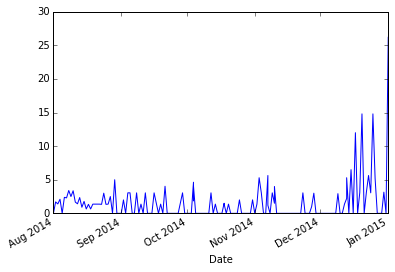

In [72]:
df['Miles'].plot()

If we want to add another line to this graph, we can do that by just calling another plot command in that same cell.

Let’s take a look at the miles versus the rolling average of the miles per week. We can do that with the `pd.rolling_mean`, and all we have to do is pass in the given DataFrame column (or Series depending on how you think about it) and the time chunk.


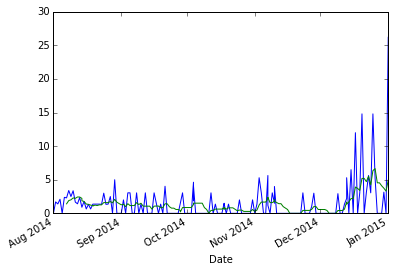

In [73]:
df['Miles'].plot()
pd.rolling_mean(df['Miles'], 7).plot()

We can do the same with the rolling standard deviation or sum.

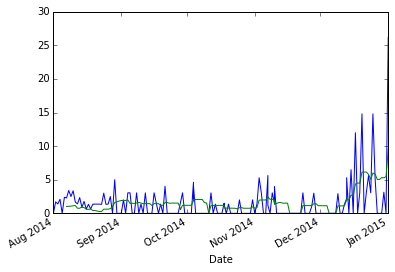

In [74]:
df['Miles'].plot()
pd.rolling_std(df['Miles'], 7).plot()

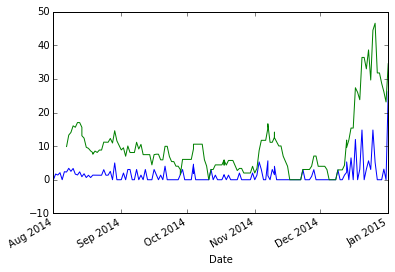

In [75]:
df['Miles'].plot()
pd.rolling_sum(df['Miles'], 7).plot()

We can see how different that rolling sum looks at the end. That's because Bill was preparing to run a marathon on January 1st, so he had to start increasing the number of miles.

## Querying DateTime Indexes

One of the great benefits of DateTime indexes is that you can query them very naturally. If we want to get all of Bill's runs in October of 2014, we just enter that as a string.

In [76]:
df.index

DatetimeIndex(['2014-08-01', '2014-08-02', '2014-08-03', '2014-08-04',
               '2014-08-05', '2014-08-06', '2014-08-07', '2014-08-08',
               '2014-08-09', '2014-08-10', 
               ...
               '2014-12-23', '2014-12-24', '2014-12-25', '2014-12-26',
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01'],
              dtype='datetime64[ns]', name='Date', length=167, freq=None, tz=None)

In [77]:
df['2014-10']

,Miles,Time,Seconds,Minutes,Min_per_mile
Date,,,,,
2014-10-01,0.00,NaN,NaN,NaN,NaN
2014-10-02,0.00,NaN,NaN,NaN,NaN
2014-10-03,0.00,NaN,NaN,NaN,NaN
2014-10-04,4.63,0:40:00,2400,40.000000,8.639309
2014-10-04,1.87,NaN,NaN,NaN,NaN
2014-10-04,4.08,0:33:00,1980,33.000000,8.088235
2014-10-05,0.00,NaN,NaN,NaN,NaN
2014-10-06,0.00,NaN,NaN,NaN,NaN
2014-10-07,0.00,NaN,NaN,NaN,NaN



If we want to get runs from November to December, we can do that using slice notation.


In [78]:
df['2014-11':'2014-12']

,Miles,Time,Seconds,Minutes,Min_per_mile
Date,,,,,
2014-11-01,0.00,NaN,NaN,NaN,NaN
2014-11-02,1.37,0:08:43,523,8.716667,6.362530
2014-11-03,5.30,0:39:26,2366,39.433333,7.440252
2014-11-04,3.05,0:22:12,1332,22.200000,7.278689
2014-11-05,0.00,NaN,NaN,NaN,NaN
2014-11-06,0.00,NaN,NaN,NaN,NaN
2014-11-07,5.63,0:49:05,2945,49.083333,8.718176
2014-11-07,1.26,NaN,NaN,NaN,NaN
2014-11-07,1.20,NaN,NaN,NaN,NaN



How do you think we might go from November to January 1, 2015?

Give it a try and see if you can figure it out.


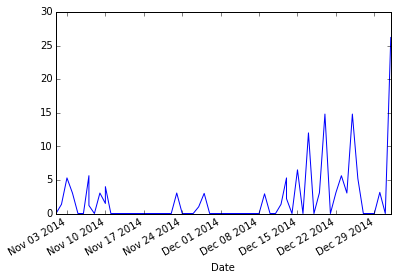

In [79]:
df['2014-11':'2015-1-1']['Miles'].plot()


We can specify a series this way, but we cannot specify a specific date to get a specific date’s run. 


In [80]:
# will error
# df['2014-8-12']

To do that we need to use `loc`, which returns the value at that index location.

In [81]:
df.loc['2014-8-12']

Miles               1.42
Time             0:10:35
Seconds              635
Minutes         10.58333
Min_per_mile    7.453052
Name: 2014-08-12 00:00:00, dtype: object

This is a good time to save our work so that we don’t have to redo everything next time we want to keep working with our data. We could save to CSV like we did before, but let's look at all the different ways you can save to a file.

Let’s save our data first to a CSV, then as an html page (which will give us a table view).

In [66]:
df.to_csv('../data/date_fixed_running_data_with_time.csv')
df.to_html('../data/date_fixed_running_data_with_time.html')

We may also want to save as a JSON file.  One thing to note, however, is that JSON files want unique indexes (because they will become the keys), so we must give our DataFrame a new index. We can do this by resetting our index.

In [83]:
# will error
# df.to_json("../data/date_fixed_running_data_with_time.json")

In [67]:
df.reset_index().to_json("../data/date_fixed_running_data_with_time.json")

There is a lot more you can do with datetime indexing, but we have managed to cover a lot of basic operations.

At this point, you should start to feel familiar with the pandas `matplotlib` workflow. It is really powerful and what data scientists around the world are working with right now.

Next, we will explore some of the more sophisticated analysis techniques that we can use including filtering, dropping rows, and grouping. Let's  start by reading in our data again.

In [68]:
df = pd.read_csv('../data/date_fixed_running_data_with_time.csv', parse_dates=['Date'], usecols=list(range(0,6)))

In [69]:
df.dtypes

Date            datetime64[ns]
Miles                  float64
Time                    object
Seconds                float64
Minutes                float64
Min_per_mile           float64
dtype: object

In [70]:
df.sort(inplace=True)
df.head()

AttributeError: 'DataFrame' object has no attribute 'sort'

First, let's see some basic statistics. We have seen how to get summary statistics for the entire data set; now let's look at how to get them for individual columns. We are also going to focus on answering real questions of this data: What is really going on behind the scenes?

Let's answer some direct questions. What are the longest and shortest runs by time and distance?

In [88]:
df.Minutes.max()

260.71666666666664

In [89]:
df.Miles.max()

26.2

In [114]:
df.Miles.min()

0.0

In [113]:
df.Minutes.min()

6.2666666666666675

We should ignore the blank values. (Remember how we filled them in with zero for the miles?)

In [92]:
df.Miles[df.Miles > 0].min()

0.65

What about getting the most common running distances excluding the times when there was no running?

In [93]:
df.Miles[df.Miles > 0].value_counts().index[0]

1.3700000000000001

Bill runs a specific route, so we know that he has done it a fair amount. Let's plot a graph of the cumulative running distance in the data set.

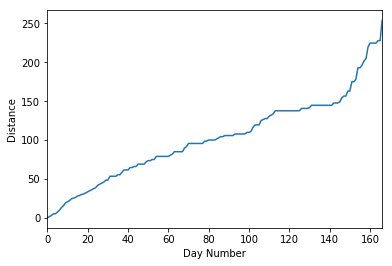

In [71]:
df.Miles.cumsum().plot()
plt.xlabel("Day Number")
plt.ylabel("Distance")

What about the cumulative total running time?

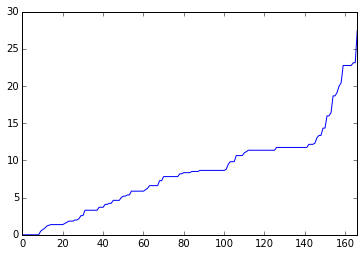

In [115]:
(df.Minutes.fillna(0).cumsum() / 60).plot()

Another interesting question we could ask is what days of the week Bill commonly goes for runs. Is he faster on certain days, or does his speed improve over time relative to the distance that he is running?

We can get days of weeks by formatting the strings.  This is a handy method to remember, and we can put it in a map to apply it to our entire Date column.

In [72]:
df.Date[0].strftime("%A")

'Friday'

In [97]:
df.Date.map(lambda x: x.strftime("%A")).head()

0      Friday
1    Saturday
2      Sunday
3      Monday
4     Tuesday
Name: Date, dtype: object

We know that is working, so let's just set it to a new column.

In [116]:
df['Day_of_week'] = df.Date.map(lambda x: x.strftime("%A"))

In [117]:
df.head()

,Date,Miles,Time,Seconds,Minutes,Min_per_mile,Day_of_week
0,2014-08-01,0.0,NaN,NaN,NaN,NaN,Friday
1,2014-08-02,1.7,NaN,NaN,NaN,NaN,Saturday
2,2014-08-03,1.4,NaN,NaN,NaN,NaN,Sunday
3,2014-08-04,2.1,NaN,NaN,NaN,NaN,Monday
4,2014-08-05,0.0,NaN,NaN,NaN,NaN,Tuesday


Let's see if we can distinguish anything unique about certain days of the week.  A good way to visualize this type of data would be using a bar graph.  We might begin by looking at the total number of runs on each day.

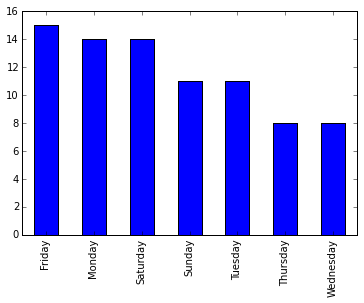

In [118]:
df[df.Miles > 0].Day_of_week.value_counts().plot(kind='bar')

We can see that in this sample that Bill runs more on Fridays, Saturdays, and Mondays than the other days. Some interesting patterns might emerge if we dig deeper, but all that this gives us is the cumulative count for each day of the week. In order for us to get at the actual summary statistics for these days, we will have to create a group. We could just manually filter out one day of the week at a time, but that is extremely inefficient. Let's approach it computationally.

Let's create a grouping using the day of the week as a key. First let's remove the Time column since we already have minutes and  seconds.

## Removing Columns

Removing columns is obviously something that you should understand, so let's look at some different techniques for doing it. First we can use the `del` keyword.

In [73]:
del(df['Time'])

This will delete it inplace, which we can confirm if we look at our columns now.

In [74]:
df.columns

Index(['Date', 'Miles', 'Seconds', 'Minutes', 'Min_per_mile'], dtype='object')

We can also use the drop method to drop a column. Let's see how that would work with the Seconds column. You will notice that we have to specify an axis (because we can drop a row as well).

In [75]:
df.drop('Seconds',axis=1).head()

,Date,Miles,Minutes,Min_per_mile
0,2014-08-01,0.0,NaN,NaN
1,2014-08-02,1.7,NaN,NaN
2,2014-08-03,1.4,NaN,NaN
3,2014-08-04,2.1,NaN,NaN
4,2014-08-05,0.0,NaN,NaN


We can also use drop to drop a specific row by specifying the 0 axis.

In [76]:
tempdf = pd.DataFrame(np.arange(4).reshape(2,2))
tempdf

,0,1
0,0,1
1,2,3


In [77]:
tempdf.drop(1,axis=0)

,0,1
0,0,1


Now that we have taken that brief stop off at dropping rows, let's get back to dropping columns. Another method is to pop out a column that will return that column as a Series and happen `inplace`. 

In [78]:
df.pop('Seconds').head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Seconds, dtype: float64

In [79]:
df.head()

,Date,Miles,Minutes,Min_per_mile
0,2014-08-01,0.0,NaN,NaN
1,2014-08-02,1.7,NaN,NaN
2,2014-08-03,1.4,NaN,NaN
3,2014-08-04,2.1,NaN,NaN
4,2014-08-05,0.0,NaN,NaN


## Groups

Now that we have made our data set a bit more manageable, we are ready to do some groupings. This is an extremely powerful part of pandas and one that you will use much of the time.

pandas follows the split-apply-combine style of data analysis.

Many data analysis problems involve the application of a split-apply-combine strategy, where one breaks up a big problem into manageable pieces, operates on each piece independently, and then puts all the pieces back together. It was created by Hadley Wickham, who is a developer that works on the R programming language. He has written a great deal of extremely popular libraries. Here's a paper on the split-apply-combine strategy: http://www.jstatsoft.org/v40/i01/paper


In our problem, we want to analyze each day of the week to see if there are any differences in the types of running that Bill does each day.  We will start by grouping our data set by weekday. This basically creates a dictionary of the data where the key is the weekday and the value is the dataframe of all those values.

First let's explore the hard way of doing this; then we will do it in the correct way.

In [80]:
for dow in df.Day_of_week.unique():
    print(dow)
    print(df[df.Day_of_week == dow])
    break

AttributeError: 'DataFrame' object has no attribute 'Day_of_week'

This is clearly an ugly way to do this. It is inefficient and error prone because there is state involved.

Let's do it in the pandas way, which is much simpler and more intuitive. The pandas way is to create a grouping object that has some special properties. However, before doing that we will filter out some of the zero values because they will throw off our analysis.

In [81]:
df['Miles'] = df.Miles[df.Miles > 0]

Notice that this replaces the zeros with NaNs.

In [82]:
df.Miles

0        NaN
1       1.70
2       1.40
3       2.10
4        NaN
5       2.38
6       2.30
7       3.40
8       2.50
9       3.36
10      1.67
11      1.42
12      2.35
13      0.90
14      0.90
15      1.78
16      0.65
17      1.34
18      0.65
19      1.37
20      1.37
21      1.37
22      1.37
23      1.37
24      1.34
25      3.00
26      1.37
27      1.34
28      1.37
29      2.50
       ...  
137      NaN
138      NaN
139      NaN
140      NaN
141      NaN
142     2.93
143      NaN
144      NaN
145     1.37
146     5.30
147     2.21
148      NaN
149     6.50
150      NaN
151    12.00
152      NaN
153     3.10
154    14.80
155      NaN
156     3.10
157     5.63
158     3.05
159    14.80
160     5.20
161      NaN
162      NaN
163      NaN
164     3.15
165      NaN
166    26.20
Name: Miles, Length: 167, dtype: float64

Now for the `groupby` method.

In [83]:
dows = df.groupby('Day_of_week')
print(dows)

KeyError: 'Day_of_week'

This will basically create day-name chunks of the data and treat those as individual DataFrames. We really just took one DataFrame and made it into seven. Let's get some information from those now.

We can get the size of each one by using the size command. This tells us how many items are in each category. The count will give us the count of each column, by group, in the data.

In [109]:
dows.size()

Day_of_week
Friday       24
Monday       25
Saturday     27
Sunday       23
Thursday     23
Tuesday      23
Wednesday    22
dtype: int64

In [110]:
dows.count()

,Date,Miles,Minutes,Min_per_mile
Day_of_week,,,,
Friday,24,15,8,8
Monday,25,14,10,10
Saturday,27,14,6,6
Sunday,23,11,8,8
Thursday,23,8,5,5
Tuesday,23,11,8,8
Wednesday,22,8,7,7


Now we have our groups and we can start doing groupwise analysis. 

This means that we can start answering questions such as "What is the average speed per weekday?" or "What is the total miles run per weekday?"

In [111]:
dows.mean()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,2.786000,24.308333,7.747657
Monday,2.607143,22.243333,7.463291
Saturday,3.246429,46.708333,8.184961
Sunday,2.422727,19.762500,7.463840
Thursday,6.315000,84.530000,8.039543
Tuesday,2.428182,21.770833,7.659706
Wednesday,3.315000,28.021429,7.829348


In [112]:
dows.sum()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,41.79,194.466667,61.981259
Monday,36.50,222.433333,74.632908
Saturday,45.45,280.250000,49.109769
Sunday,26.65,158.100000,59.710723
Thursday,50.52,422.650000,40.197717
Tuesday,26.71,174.166667,61.277645
Wednesday,26.52,196.150000,54.805434


In this case, the total number of miles run on each day is interesting; note the high values for Thursday, Friday, and Saturday.  The Min_per_mile column doesn't mean very much because we are adding together minutes per mile for different runs (and the number of runs being added is not the same for each day).

We can also get access to the summary statistics from here.

In [113]:
dows.describe()

Miles  Min_per_mile     Minutes
Day_of_week                                           
Friday      count  15.000000      8.000000    8.000000
            mean    2.786000      7.747657   24.308333
            std     1.510718      0.844590   15.376198
            min     1.200000      6.630170    9.083333
            25%     1.370000      7.025547    9.625000
            50%     3.000000      7.803279   23.800000
            75%     3.250000      8.523306   30.550000
            max     5.630000      8.718176   49.083333
Monday      count  14.000000     10.000000   10.000000
            mean    2.607143      7.463291   22.243333
            std     1.688538      1.037698   16.318699
            min     0.650000      6.000000    8.600000
            25%     1.402500      6.677835    9.637500
            50%     1.885000      7.520672   17.516667
            75%     3.087500      7.815719   26.795833
            max     6.500000      9.033333   58.716667
Saturday    count  14.000000      6.000000    6.000000
            mean    3.246429      8.184961   46.708333
            std     3.592504      0.926076   45.119311
            min     0.650000      6.444444    9.666667
            25%     1.500000      8.122780   22.487500
            50%     1.935000      8.408079   36.500000
            75%     3.685000      8.626918   42.700000
            max    14.800000      9.121622  135.000000
Sunday      count  11.000000      8.000000    8.000000
            mean    2.422727      7.463840   19.762500
            std     1.000241      0.578829    8.282836
            min     1.340000      6.362530    8.716667
            25%     1.450000      7.408470   11.300000
            50%     3.000000      7.474317   22.591667
            75%     3.050000      7.533788   24.116667
            max     4.030000      8.516865   30.366667
Thursday    count   8.000000      5.000000    5.000000
            mean    6.315000      8.039543   84.530000
            std     9.300811      1.531027  114.032318
            min     0.900000      6.861314    6.266667
            25%     0.975000      6.962963    6.266667
            50%     1.835000      6.962963    9.400000
            75%     5.987500      9.459459  140.000000
            max    26.200000      9.951018  260.716667
Tuesday     count  11.000000      8.000000    8.000000
            mean    2.428182      7.659706   21.770833
            std     1.321990      0.830158   13.777549
            min     1.370000      6.630170    9.083333
            25%     1.370000      7.218276   10.562500
            50%     2.000000      7.464231   22.183333
            75%     3.050000      7.881281   23.350000
            max     5.630000      9.206631   51.833333
Wednesday   count   8.000000      7.000000    7.000000
            mean    3.315000      7.829348   28.021429
            std     3.562291      1.142713   32.039394
            min     1.370000      6.532847    8.950000
            25%     1.467500      7.185401   10.325000
            50%     2.365000      7.411348   17.416667
            75%     2.637500      8.245219   25.066667
            max    12.000000     10.000000   99.000000

We do not always have to store the groupby object in a variable; we can also just chain these commands together to do quick exploratory analysis.

In [114]:
df.groupby('Day_of_week').mean()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,2.786000,24.308333,7.747657
Monday,2.607143,22.243333,7.463291
Saturday,3.246429,46.708333,8.184961
Sunday,2.422727,19.762500,7.463840
Thursday,6.315000,84.530000,8.039543
Tuesday,2.428182,21.770833,7.659706
Wednesday,3.315000,28.021429,7.829348


In [115]:
df.groupby('Day_of_week').std()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,1.510718,15.376198,0.844590
Monday,1.688538,16.318699,1.037698
Saturday,3.592504,45.119311,0.926076
Sunday,1.000241,8.282836,0.578829
Thursday,9.300811,114.032318,1.531027
Tuesday,1.321990,13.777549,0.830158
Wednesday,3.562291,32.039394,1.142713


We can also iterate through the groups in a straightforward way because the groupby is iterable. The iterable provides tuples of name (string) and group (DataFrame).

In [116]:
for name, group in dows:
    print(name)
    print(group.head())

Friday
         Date  Miles    Minutes  Min_per_mile Day_of_week
0  2014-08-01    NaN        NaN           NaN      Friday
7  2014-08-08   3.40        NaN           NaN      Friday
15 2014-08-15   1.78        NaN           NaN      Friday
23 2014-08-22   1.37   9.083333       6.63017      Friday
31 2014-08-29   5.00  43.450000       8.69000      Friday
Monday
         Date  Miles    Minutes  Min_per_mile Day_of_week
3  2014-08-04   2.10        NaN           NaN      Monday
10 2014-08-11   1.67  13.116667      7.854291      Monday
18 2014-08-18   0.65        NaN           NaN      Monday
26 2014-08-25   1.37   8.916667      6.508516      Monday
27 2014-08-25   1.34        NaN           NaN      Monday
Saturday
         Date  Miles  Minutes  Min_per_mile Day_of_week
1  2014-08-02   1.70      NaN           NaN    Saturday
8  2014-08-09   2.50      NaN           NaN    Saturday
16 2014-08-16   0.65      NaN           NaN    Saturday
24 2014-08-23   1.34      NaN           NaN    Saturday
3

We can also get specific groups using the `get_group` method.

In [117]:
dows.get_group('Friday').head()

,Date,Miles,Min_per_mile,Minutes
0,2014-08-01,NaN,NaN,NaN
7,2014-08-08,3.40,NaN,NaN
15,2014-08-15,1.78,NaN,NaN
23,2014-08-22,1.37,6.63017,9.083333
31,2014-08-29,5.00,8.69000,43.450000


Another command that you should be familiar with is the `agg` method. This performs an operation on each sub-DataFrame. For example, we can get counts (or total number of rows) with the `len` aggregation.

In [118]:
dows.agg(lambda x: len(x))['Miles']

Day_of_week
Friday       24
Monday       25
Saturday     27
Sunday       23
Thursday     23
Tuesday      23
Wednesday    22
Name: Miles, dtype: float64

This is probably one of the more powerful functions available in pandas because you can write your own functions. We will be doing this later on in the course as well. We can achieve this same method by just appending a Count column with the scalar value of one, then getting the sum.

In [119]:
df['Count'] = 1
df.head(10)

,Date,Miles,Minutes,Min_per_mile,Day_of_week,Count
0,2014-08-01,NaN,NaN,NaN,Friday,1
1,2014-08-02,1.70,NaN,NaN,Saturday,1
2,2014-08-03,1.40,NaN,NaN,Sunday,1
3,2014-08-04,2.10,NaN,NaN,Monday,1
4,2014-08-05,NaN,NaN,NaN,Tuesday,1
5,2014-08-06,2.38,NaN,NaN,Wednesday,1
6,2014-08-07,2.30,NaN,NaN,Thursday,1
7,2014-08-08,3.40,NaN,NaN,Friday,1
8,2014-08-09,2.50,NaN,NaN,Saturday,1
9,2014-08-10,3.36,28.616667,8.516865,Sunday,1


In [120]:
df.groupby('Day_of_week').sum()

,Miles,Minutes,Min_per_mile,Count
Day_of_week,,,,
Friday,41.79,194.466667,61.981259,24
Monday,36.50,222.433333,74.632908,25
Saturday,45.45,280.250000,49.109769,27
Sunday,26.65,158.100000,59.710723,23
Thursday,50.52,422.650000,40.197717,23
Tuesday,26.71,174.166667,61.277645,23
Wednesday,26.52,196.150000,54.805434,22


Notice how the Count column gives us exactly the same counts we had before.

We have covered a lot of foundational pandas techniques, including filtering, graphing, and grouping.  Take some time to practice these techniques on your own.  A solid grasp of these basics will help you tremendously as you go on to study more advanced data analysis using Python.